# Importing the necessarry libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler


## DATA UNDERSTANDING

#### Loading the datasets for genetic analysis

In [6]:
from google.colab import files
uploaded = files.upload()

Saving test_genetic_disorders.csv to test_genetic_disorders.csv
Saving train_genetic_disorders.csv to train_genetic_disorders.csv


In [8]:
# Load the training data
df_train = pd.read_csv('train_genetic_disorders.csv')

# Load the testing data
df_test = pd.read_csv('test_genetic_disorders.csv')


In [9]:
df_train.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [10]:
df_train.rename(columns={
    'Patient Id': 'Patient_ID',
    'Patient Age': 'Patient_Age',
    "Genes in mother's side": 'Genes_Mother_Side',
    'Inherited from father': 'Inherited_From_Father',
    'Maternal gene': 'Maternal_Gene',
    'Paternal gene': 'Paternal_Gene',
    'Blood cell count (mcL)': 'Blood_Cell_Count_mcL',
    'Patient First Name': 'Patient_First_Name',
    'Family Name': 'Family_Name',
    "Father's name": 'Fathers_Name',
    "Mother's age": 'Mothers_Age',
    "Father's age": 'Fathers_Age',
    'Institute Name': 'Institute_Name',
    'Location of Institute': 'Institute_Location',
    'Status': 'Status',
    'Respiratory Rate (breaths/min)': 'Respiratory_Rate_Breaths_Min',
    'Heart Rate (rates/min': 'Heart_Rate_Rates_Min',
    'Test 1': 'Test_1',
    'Test 2': 'Test_2',
    'Test 3': 'Test_3',
    'Test 4': 'Test_4',
    'Test 5': 'Test_5',
    'Parental consent': 'Parental_Consent',
    'Follow-up': 'Follow_Up',
    'Gender': 'Gender',
    'Birth asphyxia': 'Birth_Asphyxia',
    'Autopsy shows birth defect (if applicable)': 'Autopsy_Birth_Defect',
    'Place of birth': 'Place_Of_Birth',
    'Folic acid details (peri-conceptional)': 'Folic_Acid_Details',
    'H/O serious maternal illness': 'Maternal_Illness_History',
    'H/O radiation exposure (x-ray)': 'Radiation_Exposure_History',
    'H/O substance abuse': 'Substance_Abuse_History',
    'Assisted conception IVF/ART': 'Assisted_Conception',
    'History of anomalies in previous pregnancies': 'Anomalies_History',
    'No. of previous abortion': 'Previous_Abortion_Count',
    'Birth defects': 'Birth_Defects',
    'White Blood cell count (thousand per microliter)': 'WBC_Count',
    'Blood test result': 'Blood_Test_Result',
    'Symptom 1': 'Symptom_1',
    'Symptom 2': 'Symptom_2',
    'Symptom 3': 'Symptom_3',
    'Symptom 4': 'Symptom_4',
    'Symptom 5': 'Symptom_5',
    'Genetic Disorder': 'Genetic_Disorder',
    'Disorder Subclass': 'Disorder_Subclass'
}, inplace=True)

In [11]:
df_train.head()

,Patient_ID,Patient_Age,Genes_Mother_Side,Inherited_From_Father,Maternal_Gene,Paternal_Gene,Blood_Cell_Count_mcL,Patient_First_Name,Family_Name,Fathers_Name,...,Birth_Defects,WBC_Count,Blood_Test_Result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [12]:
#listing the unique values from Disorder_Subclass
df_train['Disorder_Subclass'].unique()

array(["Leber's hereditary optic neuropathy", 'Cystic fibrosis',
       'Diabetes', 'Leigh syndrome', 'Cancer', 'Tay-Sachs',
       'Hemochromatosis', 'Mitochondrial myopathy', nan, "Alzheimer's"],
      dtype=object)

In [13]:
#listing the unique values from Disorder_Subclass
df_train['Genetic_Disorder'].unique()

array(['Mitochondrial genetic inheritance disorders', nan,
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

In [14]:
print(df_train.value_counts)

<bound method DataFrame.value_counts of       Patient_ID  Patient_Age Genes_Mother_Side Inherited_From_Father  \
0      PID0x6418          2.0               Yes                    No   
1      PID0x25d5          4.0               Yes                   Yes   
2      PID0x4a82          6.0               Yes                    No   
3      PID0x4ac8         12.0               Yes                    No   
4      PID0x1bf7         11.0               Yes                    No   
...          ...          ...               ...                   ...   
22078        NaN          NaN               NaN                   NaN   
22079        NaN          NaN               NaN                   NaN   
22080        NaN          NaN               NaN                   NaN   
22081        NaN          NaN               NaN                   NaN   
22082        NaN          NaN               NaN                   NaN   

      Maternal_Gene Paternal_Gene  Blood_Cell_Count_mcL Patient_First_Name  \
0    

In [15]:
df_train.describe()

,Patient_Age,Blood_Cell_Count_mcL,Mothers_Age,Fathers_Age,Test_1,Test_2,Test_3,Test_4,Test_5,Previous_Abortion_Count,WBC_Count,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
count,19643.000000,21011.000000,15293.000000,15322.000000,18992.0,18958.0,18970.0,18962.0,18939.0,18957.000000,18965.000000,18955.000000,18899.000000,19008.000000,18987.000000,18956.000000
mean,6.974851,4.899004,34.522527,41.942436,0.0,0.0,0.0,1.0,0.0,2.000106,7.484680,0.592034,0.552886,0.537405,0.497393,0.460804
std,4.322584,0.199829,9.847256,13.027701,0.0,0.0,0.0,0.0,0.0,1.411488,2.653633,0.491470,0.497208,0.498612,0.500006,0.498474
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763230,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.419026,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899548,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.473071,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033977,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.528684,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df_train.dtypes

,0
Patient_ID,object
Patient_Age,float64
Genes_Mother_Side,object
Inherited_From_Father,object
Maternal_Gene,object
Paternal_Gene,object
Blood_Cell_Count_mcL,float64
Patient_First_Name,object
Family_Name,object
Fathers_Name,object


## EXPLORATORY DATA ANALYSIS (EDA)

 ### Visualization for null and missing values the null values in the dataset

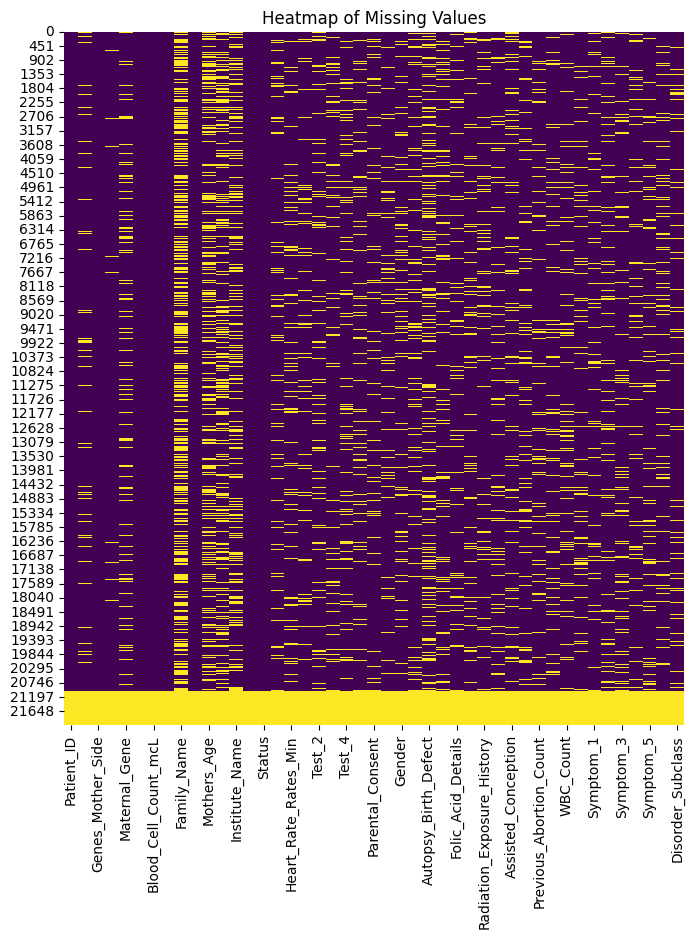

In [17]:
#Creating heatmap
plt.figure(figsize=(8,9))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

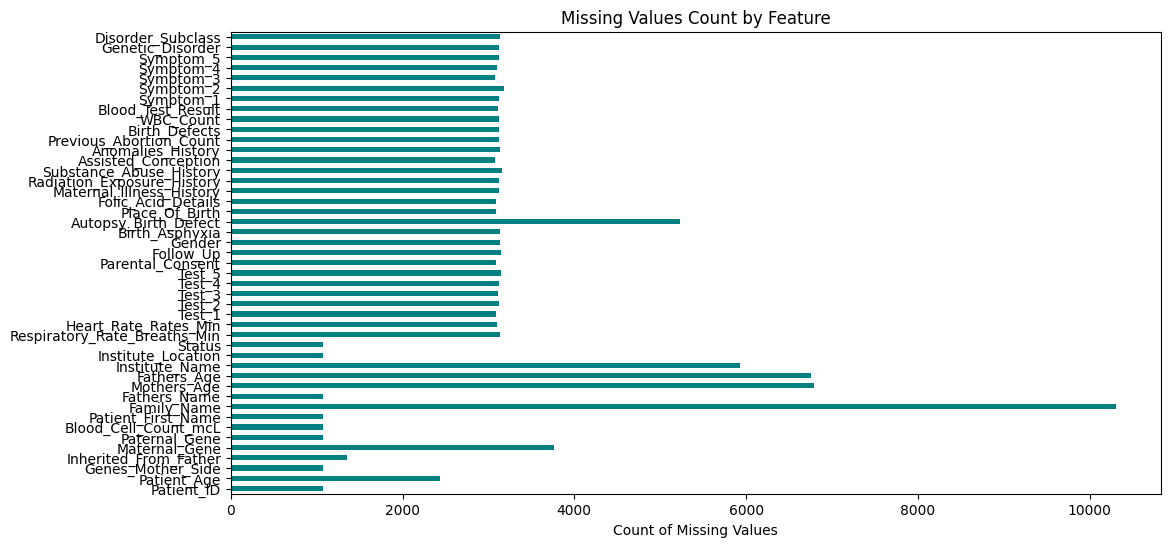

In [18]:
# Bar plot to show the count of missing values per column
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(12,6))
missing_values.plot(kind='barh', color='teal')
plt.title('Missing Values Count by Feature')
plt.xlabel('Count of Missing Values')
plt.show()

In [19]:
df_train.columns

Index(['Patient_ID', 'Patient_Age', 'Genes_Mother_Side',
       'Inherited_From_Father', 'Maternal_Gene', 'Paternal_Gene',
       'Blood_Cell_Count_mcL', 'Patient_First_Name', 'Family_Name',
       'Fathers_Name', 'Mothers_Age', 'Fathers_Age', 'Institute_Name',
       'Institute_Location', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rate_Rates_Min', 'Test_1', 'Test_2', 'Test_3', 'Test_4',
       'Test_5', 'Parental_Consent', 'Follow_Up', 'Gender', 'Birth_Asphyxia',
       'Autopsy_Birth_Defect', 'Place_Of_Birth', 'Folic_Acid_Details',
       'Maternal_Illness_History', 'Radiation_Exposure_History',
       'Substance_Abuse_History', 'Assisted_Conception', 'Anomalies_History',
       'Previous_Abortion_Count', 'Birth_Defects', 'WBC_Count',
       'Blood_Test_Result', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Genetic_Disorder', 'Disorder_Subclass'],
      dtype='object')

## DATA PRE-PROCESSING

* Cleaning, transforming, and integrating of data in order to make it ready for analysis.  
* Removing of unnecessary columns, missing values and null values.

In [20]:
df_train.dtypes

,0
Patient_ID,object
Patient_Age,float64
Genes_Mother_Side,object
Inherited_From_Father,object
Maternal_Gene,object
Paternal_Gene,object
Blood_Cell_Count_mcL,float64
Patient_First_Name,object
Family_Name,object
Fathers_Name,object


In [21]:
subclass_na_count = df_train["Disorder_Subclass"].isna().sum()
print(subclass_na_count)

3140


In [22]:
df_train = df_train.dropna(subset = ['Disorder_Subclass'])
subclass_na = df_train["Disorder_Subclass"].isna().sum()
print(subclass_na)

0


#### Replacing the null values from the dataset

In [23]:
# Replacing NA in No. of Previous of Abortions with the median of the variable
df_train["Previous_Abortion_Count"].fillna(df_train["Previous_Abortion_Count"].median(), inplace=True)
df_train["Previous_Abortion_Count"] = df_train["Previous_Abortion_Count"].astype("int64")

# Replacing NA in White Blood cell count (thousand per microliter) with the median of the variable
df_train["WBC_Count"].fillna(df_train["WBC_Count"].median(), inplace=True)

# Replacing NA in Patient's age with the median of the variable
df_train["Patient_Age"].fillna(df_train["Patient_Age"].median(), inplace=True)
df_train["Patient_Age"] = df_train["Patient_Age"].astype("int64")

# Replacing NA in Blood cell count with the median of the variable
df_train["Blood_Cell_Count_mcL"].fillna(df_train["Blood_Cell_Count_mcL"].mean(), inplace=True)

df_train = df_train.replace(["-", "Not applicable", "Not available", "None", "No record"], "No")

<ipython-input-23-ab600946df18>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["Previous_Abortion_Count"].fillna(df_train["Previous_Abortion_Count"].median(), inplace=True)
<ipython-input-23-ab600946df18>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18943 entries, 0 to 21010
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    18943 non-null  object 
 1   Patient_Age                   18943 non-null  int64  
 2   Genes_Mother_Side             18943 non-null  object 
 3   Inherited_From_Father         18697 non-null  object 
 4   Maternal_Gene                 16634 non-null  object 
 5   Paternal_Gene                 18943 non-null  object 
 6   Blood_Cell_Count_mcL          18943 non-null  float64
 7   Patient_First_Name            18943 non-null  object 
 8   Family_Name                   10988 non-null  object 
 9   Fathers_Name                  18943 non-null  object 
 10  Mothers_Age                   14018 non-null  float64
 11  Fathers_Age                   14081 non-null  float64
 12  Institute_Name                14790 non-null  object 
 13  Instit

In [25]:
#df_train[["Blood test result", "Birth defects", "Gender", "Heart Rate (rates/min", "Respiratory Rate (breaths/min)", "Follow-up", "Place of birth"]] = df_train[["Blood test result", "Birth defects", "Gender", "Heart Rate (rates/min", "Respiratory Rate (breaths/min)", "Follow-up", "Place of birth"]].fillna('Unknown')

In [27]:
# Optional: rename columns to remove spaces and ensure consistency
df_train.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)

# Convert target variable to numeric if it's categorical
if df_train["Genetic_Disorder"].dtype == "object":
    le = LabelEncoder()
    df_train["Genetic_Disorder"] = le.fit_transform(df_train["Genetic_Disorder"])

# Select numeric columns only
numeric_df = df_train.select_dtypes(include=['number'])

# Calculate and print correlation with the target
correlation = numeric_df.corr()
print(correlation["Genetic_Disorder"].sort_values(ascending=False))

Genetic_Disorder           1.000000
WBC_Count                  0.009487
Fathers_Age                0.000770
Patient_Age                0.000582
Symptom_1                 -0.000281
Symptom_5                 -0.000838
Blood_Cell_Count_mcL      -0.003975
Mothers_Age               -0.004267
Symptom_3                 -0.004850
Symptom_4                 -0.006062
Previous_Abortion_Count   -0.006136
Symptom_2                 -0.020565
Test_1                          NaN
Test_2                          NaN
Test_3                          NaN
Test_4                          NaN
Test_5                          NaN
Name: Genetic_Disorder, dtype: float64


#### Dropping the columns that are irrelevant tto genetic disorder prediction

In [28]:
drop_columns = [
    "Patient_ID", "Family_Name", "Fathers_Name", "Mothers_Age", "Fathers_Age",
    "Place_Of_Birth", "Institute_Location", "Institute_Name",
    "Respiratory_Rate_Breaths_Min", "Heart_Rate_Rates_Min",
    "Status", "Parental_Consent", "Follow_Up",
    "Test_1", "Test_2", "Test_3", "Test_4", "Test_5",
]

# Drop the columns
df_train.drop(columns=drop_columns, inplace=True)


In [29]:
df_train.columns

Index(['Patient_Age', 'Genes_Mother_Side', 'Inherited_From_Father',
       'Maternal_Gene', 'Paternal_Gene', 'Blood_Cell_Count_mcL',
       'Patient_First_Name', 'Gender', 'Birth_Asphyxia',
       'Autopsy_Birth_Defect', 'Folic_Acid_Details',
       'Maternal_Illness_History', 'Radiation_Exposure_History',
       'Substance_Abuse_History', 'Assisted_Conception', 'Anomalies_History',
       'Previous_Abortion_Count', 'Birth_Defects', 'WBC_Count',
       'Blood_Test_Result', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Genetic_Disorder', 'Disorder_Subclass'],
      dtype='object')

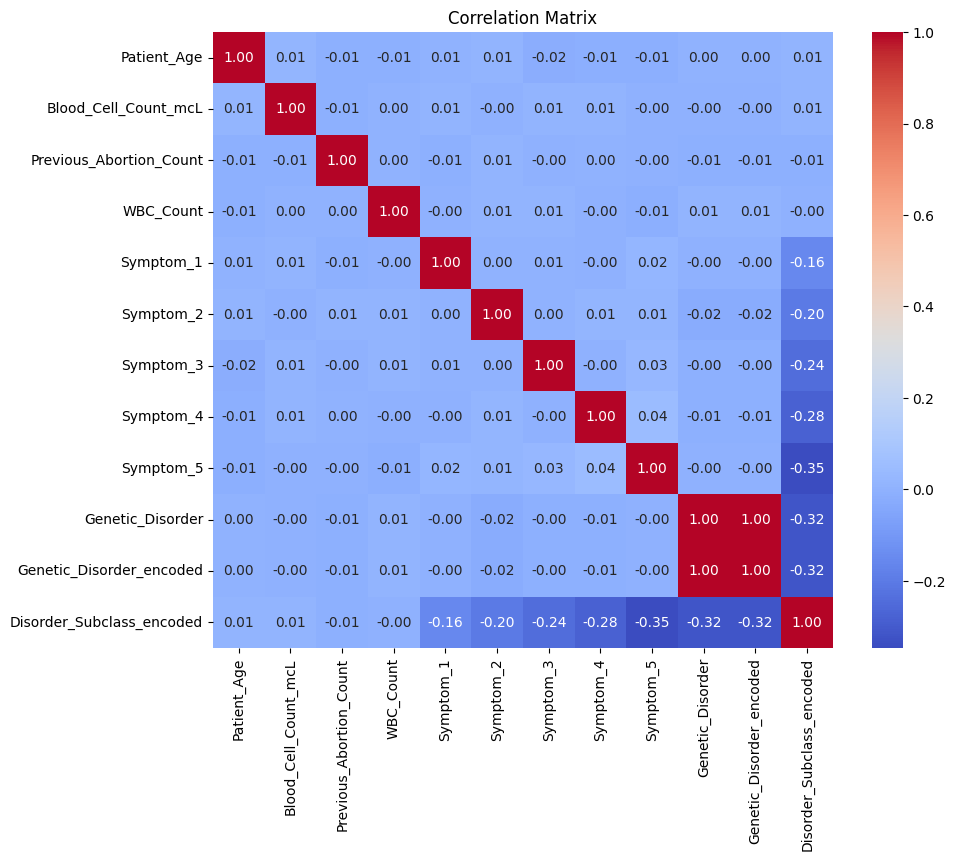

In [30]:
df_train['Genetic_Disorder_encoded'] = df_train['Genetic_Disorder'].astype('category').cat.codes
df_train['Disorder_Subclass_encoded'] = df_train['Disorder_Subclass'].astype('category').cat.codes

# Select numerical features and encoded targets
numerical_data = df_train.select_dtypes(include=['int64', 'float64'])
targets = df_train[['Genetic_Disorder_encoded', 'Disorder_Subclass_encoded']]
combined_data = pd.concat([numerical_data, targets], axis=1)

# Compute correlation matrix
correlation_matrix = combined_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## FEATURE ENGINEERING

In [31]:
cat_columns = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5']
# Convert the specified columns to categorical
for col in cat_columns:
    df_train[col] = df_train[col].astype('object')

In [32]:
numerical_cols = df_train.select_dtypes(include=["number"]).columns
categorical_cols = df_train.select_dtypes(include=["object"]).columns

In [33]:
df_train['Disorder_Subclass'].unique()

array(["Leber's hereditary optic neuropathy", 'Cystic fibrosis',
       'Diabetes', 'Leigh syndrome', 'Cancer', 'Tay-Sachs',
       'Hemochromatosis', 'Mitochondrial myopathy', "Alzheimer's"],
      dtype=object)

In [34]:
disorder_mapping = {
    "Leber's hereditary optic neuropathy": "Mitochondrial genetic inheritance disorders",
    "Leigh syndrome": "Mitochondrial genetic inheritance disorders",
    "Mitochondrial myopathy": "Mitochondrial genetic inheritance disorders",
    "Alzheimer's": "Multifactorial genetic inheritance disorders",
    "Cancer": "Multifactorial genetic inheritance disorders",
    "Diabetes": "Multifactorial genetic inheritance disorders",
    "Cystic fibrosis": "Single-gene inheritance diseases",
    "Hemochromatosis": "Single-gene inheritance diseases",
    "Tay-Sachs": "Single-gene inheritance diseases",
}

In [35]:
# Fill Missing 'Genetic Disorder' Based on 'Disorder Subclass'

def fill_genetic_disorder(row):
    if pd.isnull(row["Genetic_Disorder"]) and row["Disorder_Subclass"] in disorder_mapping:
        return disorder_mapping[row["Disorder Subclass"]]
    else:
        return row["Genetic_Disorder"]

df_train["Genetic_Disorder"] = df_train.apply(fill_genetic_disorder, axis=1)

In [36]:
# Fill Missing Values for Both 'Genetic Disorder' and 'Disorder Subclass'

def fill_missing_values(df_train):
    # Fill missing 'Genetic Disorder' based on 'Disorder Subclass'
    for subclass in df_train['Disorder_Subclass'].dropna().unique():
        mode_genetic_disorder = df_train[df_train['Disorder_Subclass'] == subclass]['Genetic_Disorder'].mode()
        if not mode_genetic_disorder.empty:
            df_train.loc[
                (df_train['Disorder_Subclass'] == subclass) & (df_train['Genetic_Disorder'].isnull()),
                'Genetic_Disorder'
            ] = mode_genetic_disorder[0]

    # Fill missing 'Disorder Subclass' based on 'Genetic Disorder'
    for disorder in df_train['Genetic_Disorder'].dropna().unique():
        mode_disorder_subclass = df_train[df_train['Genetic_Disorder'] == disorder]['Disorder_Subclass'].mode()
        if not mode_disorder_subclass.empty:
            df_train.loc[
                (df_train['Genetic_Disorder'] == disorder) & (df_train['Disorder_Subclass'].isnull()),
                'Disorder_Subclass'
            ] = mode_disorder_subclass[0]

    return df_train

df_train = fill_missing_values(df_train)

In [37]:
# Fill Null Values Based on Grouping
grouped = df_train.groupby(["Genetic_Disorder", "Disorder_Subclass"])

def fill_nulls(group):
    for column in group.columns:
        if group[column].isnull().any():
            if group[column].dtype == 'object':
                mode_value = group[column].mode()
                if not mode_value.empty:
                    group[column] = group[column].fillna(mode_value[0])
            else:
                median_value = group[column].median()
                group[column] = group[column].fillna(median_value)
    return group

df_train = grouped.apply(fill_nulls).reset_index(drop=True)

<ipython-input-37-219cb6163417>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group[column] = group[column].fillna(mode_value[0])
<ipython-input-37-219cb6163417>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train = grouped.apply(fill_nulls).reset_index(drop=True)


In [38]:
df_train.shape

(18943, 29)

In [39]:
# Drop Rows with Missing 'Genetic Disorder' or 'Disorder Subclass'
df_train = df_train.dropna(subset=["Genetic_Disorder", "Disorder_Subclass"])
df_train.shape

(18943, 29)

In [40]:
df_train.isnull().sum().head()  # now we donot have any nulls in our data

,0
Patient_Age,0
Genes_Mother_Side,0
Inherited_From_Father,0
Maternal_Gene,0
Paternal_Gene,0


In [41]:
# Replace Missing Values in Categorical Columns

missing_values = ["No record", "Not available", "Not applicable", "-", "Ambiguous"]

# Replace specified values with 'Missing' in categorical columns
categorical_cols = df_train.select_dtypes(include='object').columns
for col in categorical_cols:
    df_train[col] = df_train[col].replace(missing_values, 'Missing')
df_train.head()

<ipython-input-41-0b7c2bef479e>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train[col] = df_train[col].replace(missing_values, 'Missing')


,Patient_Age,Genes_Mother_Side,Inherited_From_Father,Maternal_Gene,Paternal_Gene,Blood_Cell_Count_mcL,Patient_First_Name,Gender,Birth_Asphyxia,Autopsy_Birth_Defect,...,Blood_Test_Result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass,Genetic_Disorder_encoded,Disorder_Subclass_encoded
0,2,Yes,No,Yes,No,4.760603,Richard,Male,No,No,...,slightly abnormal,1.0,1.0,1.0,1.0,1.0,0,Leber's hereditary optic neuropathy,0,5
1,11,Yes,No,Yes,No,5.073391,Ryan,Male,No,No,...,slightly abnormal,1.0,1.0,1.0,1.0,1.0,0,Leber's hereditary optic neuropathy,0,5
2,10,Yes,Yes,Yes,Yes,5.067562,Geoffrey,Female,No,No,...,slightly abnormal,1.0,0.0,1.0,1.0,1.0,0,Leber's hereditary optic neuropathy,0,5
3,7,Yes,No,Yes,Yes,5.133352,Charles,Male,No,No,...,normal,1.0,1.0,1.0,0.0,1.0,0,Leber's hereditary optic neuropathy,0,5
4,13,Yes,Yes,Yes,Yes,4.805143,Deanne,Female,No,No,...,slightly abnormal,1.0,1.0,0.0,1.0,1.0,0,Leber's hereditary optic neuropathy,0,5


## MODEL TRAINING

### Train, Test and Split of data

In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])

In [43]:
import numpy as np
X =df_train.drop(columns=['Disorder_Subclass'])
Y = df_train[['Disorder_Subclass']]
Y = np.ravel(Y)

x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 42)

# Checking the shape of the train and test sets
print(f"Training set size: {x_train.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")

Training set size: 15154
Test set size: 3789


#### Model the train sets for prediction

In [44]:
# Define the classifiers dictionary  with predictive models
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs', C=0.1),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

#### Evaluate the prediction and accuracy of the predictive model using  
* accuracy_score
* precision_score
* recall_score

In [45]:

def evaluate_model(model, x_test, y_test):
    # Predicted on the test set

    y_pred = model.predict(x_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the results
    print(f'Accuracy: {accuracy*100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

    return accuracy, precision, recall, f1

# Assuming x_train, x_test, y_train, y_test are defined
results = []

for classifier_name, model in classifiers.items():
    model.fit(x_train, y_train)  # Fit the model
    print(f'Evaluating {classifier_name}')
    accuracy, precision, recall, f1 = evaluate_model(model, x_test, y_test)
    results.append({
        'Model': classifier_name,
        'Accuracy (%)': accuracy * 100,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
# Creating a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the table
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating Logistic Regression
Accuracy: 86.67%
Precision: 0.69
Recall: 0.87
F1 Score: 0.85
Evaluating Decision Tree
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Evaluating Random Forest
Accuracy: 99.84%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


,Model,Accuracy (%),Precision,Recall,F1 Score
0,Logistic Regression,86.671945,0.690060,0.866719,0.851186
1,Decision Tree,100.000000,1.000000,1.000000,1.000000
2,Random Forest,99.841647,0.999084,0.998416,0.998399


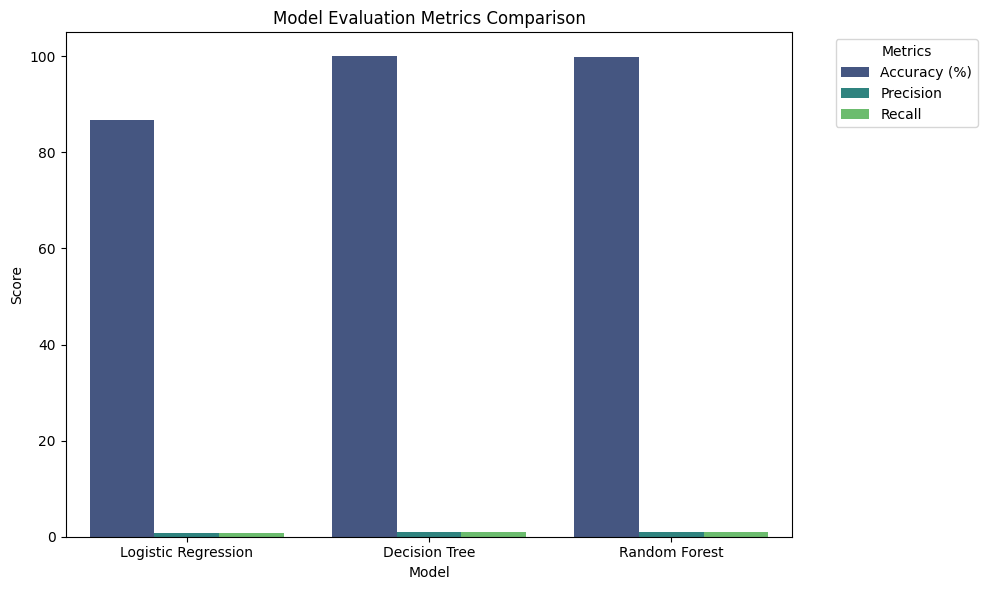

In [46]:
# Melting the DataFrame for easier plotting
results_melted = results_df.melt(id_vars=['Model'], value_vars=['Accuracy (%)', 'Precision', 'Recall'],
                                 var_name='Metric', value_name='Score')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted, palette='viridis')

plt.title('Model Evaluation Metrics Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Using MinMaxScaler with Logistic Regression:
Train Accuracy: 0.8658
Test Accuracy: 0.8533
----------------------------------------
Using RobustScaler with Logistic Regression:
Train Accuracy: 0.9357
Test Accuracy: 0.9277
----------------------------------------
Using StandardScaler with Logistic Regression:
Train Accuracy: 0.9609
Test Accuracy: 0.9559
----------------------------------------
Confusion Matrix for Logistic Regression using StandardScaler:


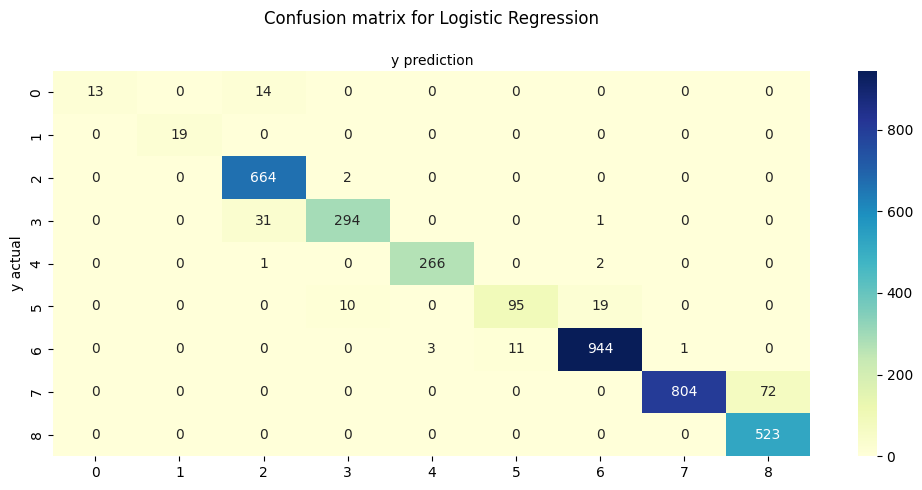

Classification Report for Logistic Regression using StandardScaler:
              precision    recall  f1-score   support

           0       1.00      0.48      0.65        27
           1       1.00      1.00      1.00        19
           2       0.94      1.00      0.97       666
           3       0.96      0.90      0.93       326
           4       0.99      0.99      0.99       269
           5       0.90      0.77      0.83       124
           6       0.98      0.98      0.98       959
           7       1.00      0.92      0.96       876
           8       0.88      1.00      0.94       523

    accuracy                           0.96      3789
   macro avg       0.96      0.89      0.91      3789
weighted avg       0.96      0.96      0.96      3789

Using MinMaxScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
----------------------------------------
Using RobustScaler with Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 1.0000
------------------

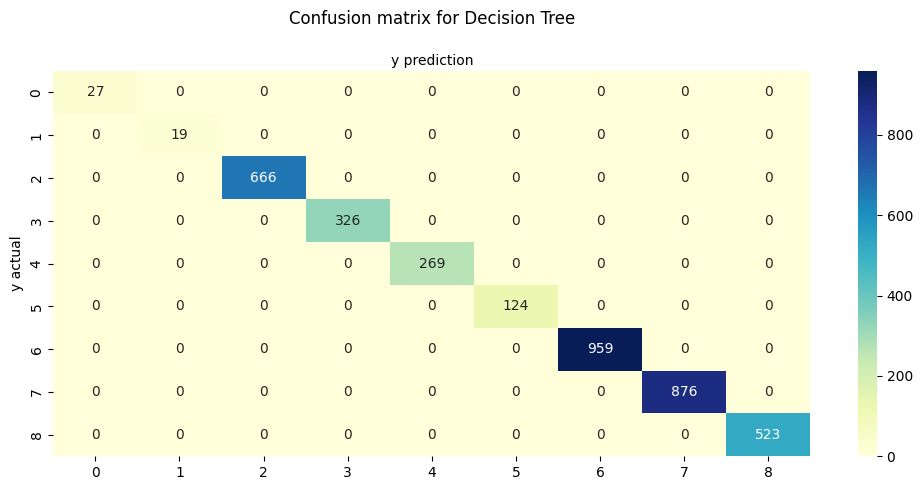

Classification Report for Decision Tree using MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00       666
           3       1.00      1.00      1.00       326
           4       1.00      1.00      1.00       269
           5       1.00      1.00      1.00       124
           6       1.00      1.00      1.00       959
           7       1.00      1.00      1.00       876
           8       1.00      1.00      1.00       523

    accuracy                           1.00      3789
   macro avg       1.00      1.00      1.00      3789
weighted avg       1.00      1.00      1.00      3789

Using MinMaxScaler with Random Forest:
Train Accuracy: 1.0000
Test Accuracy: 0.9984
----------------------------------------
Using RobustScaler with Random Forest:
Train Accuracy: 1.0000
Test Accuracy: 0.9984
--------------------------

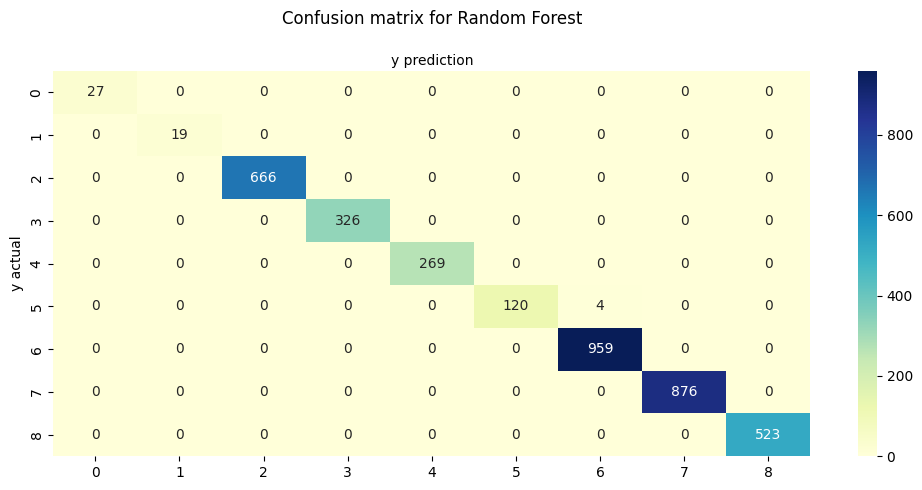

Classification Report for Random Forest using StandardScaler:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00       666
           3       1.00      1.00      1.00       326
           4       1.00      1.00      1.00       269
           5       1.00      0.97      0.98       124
           6       1.00      1.00      1.00       959
           7       1.00      1.00      1.00       876
           8       1.00      1.00      1.00       523

    accuracy                           1.00      3789
   macro avg       1.00      1.00      1.00      3789
weighted avg       1.00      1.00      1.00      3789



,Model,Scaler,Train Accuracy,Test Accuracy
0,Logistic Regression,StandardScaler,0.960868,0.955925
1,Decision Tree,MinMaxScaler,1.000000,1.000000
2,Random Forest,StandardScaler,1.000000,0.998944


In [47]:

scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}


best_models = {}
accuracy_results = []


for classifier_name, classifier in classifiers.items():
    best_accuracy = 0
    best_scaler_name = None
    best_y_pred = None
    best_model = None


    for scaler_name, scaler in scalers.items():

        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)


        classifier.fit(x_train_scaled, y_train)
        y_pred = classifier.predict(x_test_scaled)


        train_accuracy = accuracy_score(y_train, classifier.predict(x_train_scaled))
        test_accuracy = accuracy_score(y_test, y_pred)


        print(f'Using {scaler_name} with {classifier_name}:')
        print(f'Train Accuracy: {train_accuracy:.4f}')
        print(f'Test Accuracy: {test_accuracy:.4f}')
        print('-' * 40)


        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_scaler_name = scaler_name
            best_y_pred = y_pred
            best_model = classifier
    best_models[classifier_name] = (best_model, best_scaler_name)


    print(f'Confusion Matrix for {classifier_name} using {best_scaler_name}:')
    cm = confusion_matrix(y_test, best_y_pred)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f'Confusion matrix for {classifier_name}', y=1.1)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.xlabel('y prediction')
    plt.ylabel('y actual')
    plt.show()

    # Print classification report
    print(f'Classification Report for {classifier_name} using {best_scaler_name}:')
    report = classification_report(y_test, best_y_pred)
    print(report)

    accuracy_results.append({
        'Model': classifier_name,
        'Scaler': best_scaler_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': best_accuracy
    })

accuracy_df = pd.DataFrame(accuracy_results)
display(accuracy_df)


In [50]:
df_train['Disorder_Subclass']

,Disorder_Subclass
0,5
1,5
2,5
3,5
4,5
...,...
18938,8
18939,8
18940,8
18941,8
